Customer Churn Prediction Using Artificial Neural Network (ANN)

Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(["customerID"], axis="columns", inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
np.array(df["MonthlyCharges"][:5])

array([29.85, 56.95, 53.85, 42.3 , 70.7 ])

In [6]:
np.array(df["TotalCharges"][:5])

array(['29.85', '1889.5', '108.15', '1840.75', '151.65'], dtype=object)

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df["TotalCharges"][0:5]

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [9]:
df["TotalCharges"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[df.TotalCharges.isnull()].shape

(11, 20)

In [11]:
df = df[df.TotalCharges.notna()]

In [12]:
df[df.TotalCharges.isnull()].shape

(0, 20)

In [13]:
def print_unique_vals(df):
    for col in df.columns:
        print(f"{col} ---> {df[col].unique()}")

In [14]:
print_unique_vals(df)

gender ---> ['Female' 'Male']
SeniorCitizen ---> [0 1]
Partner ---> ['Yes' 'No']
Dependents ---> ['No' 'Yes']
tenure ---> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ---> ['No' 'Yes']
MultipleLines ---> ['No phone service' 'No' 'Yes']
InternetService ---> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ---> ['No' 'Yes' 'No internet service']
OnlineBackup ---> ['Yes' 'No' 'No internet service']
DeviceProtection ---> ['No' 'Yes' 'No internet service']
TechSupport ---> ['No' 'Yes' 'No internet service']
StreamingTV ---> ['No' 'Yes' 'No internet service']
StreamingMovies ---> ['No' 'Yes' 'No internet service']
Contract ---> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---> ['Yes' 'No']
PaymentMethod ---> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Mon

In [15]:
df = df.replace("No internet service", "No")

In [16]:
df = df.replace("No phone service", "No")

In [17]:
print_unique_vals(df)

gender ---> ['Female' 'Male']
SeniorCitizen ---> [0 1]
Partner ---> ['Yes' 'No']
Dependents ---> ['No' 'Yes']
tenure ---> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ---> ['No' 'Yes']
MultipleLines ---> ['No' 'Yes']
InternetService ---> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ---> ['No' 'Yes']
OnlineBackup ---> ['Yes' 'No']
DeviceProtection ---> ['No' 'Yes']
TechSupport ---> ['No' 'Yes']
StreamingTV ---> ['No' 'Yes']
StreamingMovies ---> ['No' 'Yes']
Contract ---> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---> ['Yes' 'No']
PaymentMethod ---> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges ---> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ---> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ---> ['No' 'Ye

Histogram comparing 'Tenure' for Churned and Non-Churned customers

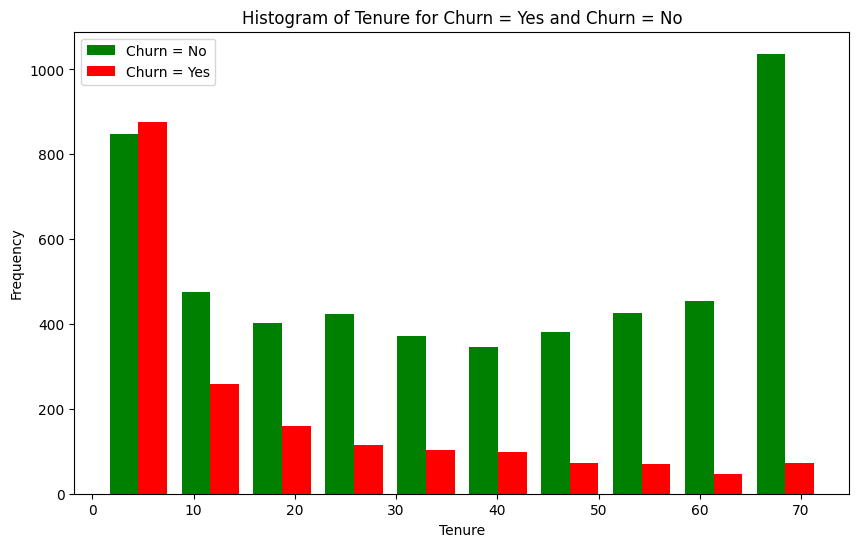

In [18]:
tenure_churn_no = df[df.Churn == "No"].tenure
tenure_churn_yes = df[df.Churn == "Yes"].tenure

plt.figure(figsize=(10, 6))
plt.hist([tenure_churn_no, tenure_churn_yes], bins=10, alpha=1.0, label=['Churn = No', 'Churn = Yes'], color=['green','red'])

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure for Churn = Yes and Churn = No')

plt.legend()

plt.show()

Histogram comparing 'Monthly Charges' for Churned and Non-Churned customers

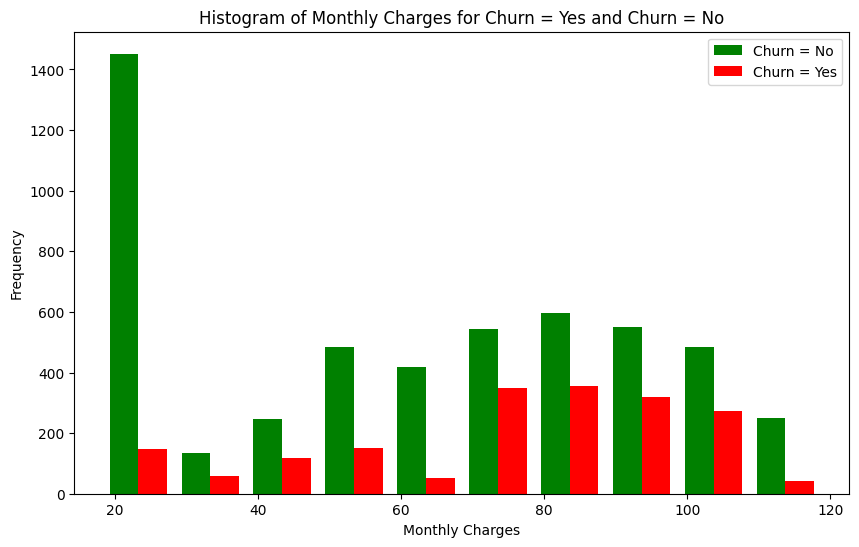

In [19]:
mc_churn_no = df[df.Churn == "No"].MonthlyCharges
mc_churn_yes = df[df.Churn == "Yes"].MonthlyCharges

plt.figure(figsize=(10, 6))
plt.hist([mc_churn_no, mc_churn_yes], bins=10, alpha=1.0, label=['Churn = No', 'Churn = Yes'], color=['green','red'])

plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges for Churn = Yes and Churn = No')

plt.legend()

plt.show()

In [20]:
df = df.replace({"Yes" : 1, "No" : 0})

C:\Users\jaggi\AppData\Local\Temp\ipykernel_11624\2275232686.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes" : 1, "No" : 0})


In [21]:
df["gender"].replace({"Female":1,"Male":0},inplace=True)

C:\Users\jaggi\AppData\Local\Temp\ipykernel_11624\2657997872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].replace({"Female":1,"Male":0},inplace=True)
C:\Users\jaggi\AppData\Local\Temp\ipykernel_11624\2657997872.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"].repl

In [22]:
print_unique_vals(df)

gender ---> [1 0]
SeniorCitizen ---> [0 1]
Partner ---> [1 0]
Dependents ---> [0 1]
tenure ---> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ---> [0 1]
MultipleLines ---> [0 1]
InternetService ---> ['DSL' 'Fiber optic' 0]
OnlineSecurity ---> [0 1]
OnlineBackup ---> [1 0]
DeviceProtection ---> [0 1]
TechSupport ---> [0 1]
StreamingTV ---> [0 1]
StreamingMovies ---> [0 1]
Contract ---> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---> [1 0]
PaymentMethod ---> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges ---> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ---> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ---> [0 1]


 Creating dummy variables for categorical columns

In [23]:
df = pd.get_dummies(data=df, columns=["InternetService","Contract","PaymentMethod"])
df = df.astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


Scaling the columns using MinMaxScaler to normalize values between 0 and 1

In [24]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [25]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [26]:
x = df.drop(["Churn"], axis="columns")
y = df.Churn

In [27]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")

x_sm, y_sm = smote.fit_resample(x,y)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2, random_state=5, stratify=y_sm)

In [30]:
y_train.value_counts(), y_test.value_counts()

(Churn
 0    4130
 1    4130
 Name: count, dtype: int64,
 Churn
 1    1033
 0    1033
 Name: count, dtype: int64)

In [31]:
x_train.shape

(8260, 26)

In [32]:
x_test.shape

(2066, 26)

Building, compiling, and training a neural network with two hidden layers to predict binary outcomes

In [34]:
model = keras.Sequential([
    keras.layers.Dense(64, input_dim = 26, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train, y_train, epochs = 100)

C:\Users\jaggi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7427 - loss: 0.5386
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7783 - loss: 0.4642
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7810 - loss: 0.4561
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4345
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.4370
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.4261
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.4207
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4144
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8135 - loss: 0.3978
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8260 - loss: 0.3912
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.3914
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [35]:
model.evaluate(x_test, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.5821


[0.5937637686729431, 0.8170377612113953]

In [36]:
y_predicted = model.predict(x_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
y_test[:5]

7310    1
9578    1
9370    1
3366    0
1250    0
Name: Churn, dtype: int64

In [38]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:5]

[1, 1, 1, 0, 0]

Generating the confusion matrix and classification report to evaluate the performance of the model on the test data

In [40]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1033
           1       0.79      0.86      0.82      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[799, 234],
       [144, 889]])

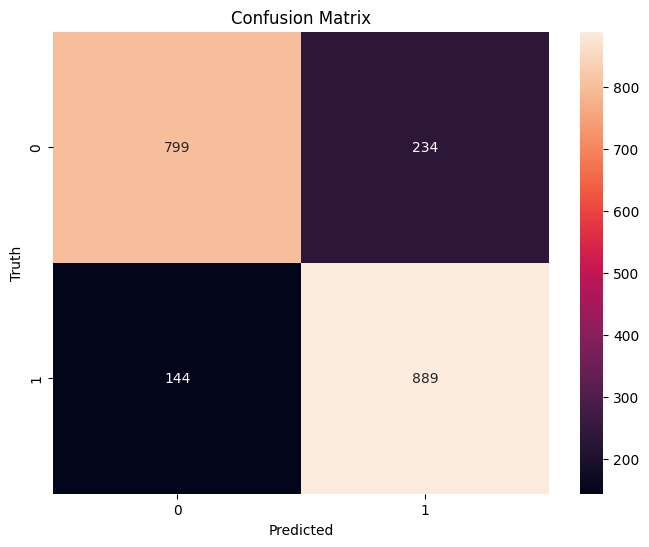

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

**Project Summary: Customer Churn Prediction Using Artificial Neural Networks (ANN)**

**--> Project Overview:**

The objective of this project was to predict customer churn for a telecom company using Artificial Neural Networks (ANN). The goal was to build a model that could effectively classify whether a customer would churn (leave) or stay based on various features like tenure, monthly charges, and services used. By leveraging ANN, we aimed to achieve high accuracy in prediction and provide insights into customer behavior.

**--> Data Preprocessing:**

The first step in the project involved exploring and cleaning the data. The dataset contained information such as:

Customer's tenure (length of time they have been with the company)
Monthly Charges,
Total Charges,
Churn status (target variable: "Yes" or "No")

**--> Key preprocessing steps included:**

Handling missing values in columns like TotalCharges.
Scaling numerical features like Tenure, MonthlyCharges, and TotalCharges using MinMaxScaler to normalize the data between 0 and 1.

**--> Model Building:**

**I built a simple Artificial Neural Network (ANN) with the following architecture:**

Input Layer: The model receives 26 features as input.
Hidden Layers: Two dense hidden layers with 64 and 128 neurons, respectively, and the ReLU activation function to introduce non-linearity.
Output Layer: A single neuron with sigmoid activation, which outputs a value between 0 and 1 to represent the likelihood of churn.

**The model was compiled with:**

Adam optimizer for adaptive learning rate.
Binary Crossentropy loss function, as this is a binary classification problem.
Accuracy as the evaluation metric to monitor model performance.

**--> Model Training:**

I trained the model for 10 epochs using the training data, ensuring it learns from the patterns and relationships between the input features and the target variable. I evaluated the model on the test data after training.

**--> Model Evaluation:**

**The performance of the model was assessed using:**

**Confusion Matrix:** To understand the true positives, false positives, true negatives, and false negatives.

**Classification Report:** To evaluate the precision, recall, and F1-score for churn prediction.

**Accuracy:** The percentage of correct predictions.

The model achieved an accuracy of 81% on the test set, with a good balance between precision and recall, indicating that it was effective in identifying customers likely to churn.

**--> Challenges Faced:**

**While working on the project, I encountered several challenges:**

**Missing Data:** Some columns had missing or incomplete data, especially TotalCharges. I had to find an effective way to handle missing values without losing valuable information.

**Class Imbalance:** The churn dataset had more customers who did not churn compared to those who did. I had to ensure that the model didn’t get biased toward predicting the majority class, which I addressed through evaluation metrics like F1-score.

**Model Tuning:** Tuning the architecture of the neural network was a challenge. I experimented with different numbers of neurons, activation functions, and epochs to find the optimal configuration.

**Feature Scaling:** The scaling of features was important to ensure the model could learn efficiently and avoid biases from differing feature magnitudes.

**--> Conclusion:**

This project demonstrated the effectiveness of Artificial Neural Networks in predicting customer churn. With proper preprocessing, model architecture, and evaluation techniques, the ANN model was able to make accurate predictions. The insights gained from this model can help businesses take proactive measures to retain customers and reduce churn.

By understanding which factors contribute most to customer churn, the company can design targeted interventions, offer promotions, or improve customer service to reduce the likelihood of customers leaving.